In [2]:
pip install wordcloud


  Using cached wordcloud-1.9.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached wordcloud-1.9.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (541 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (309 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [7]:
dataset = pd.read_csv("name.csv")

In [8]:
dataset.head()


,Name,Gender
0,AILINE,1
1,ALEINE,1
2,ALIINE,1
3,ALINE,1
4,ALINER,1


In [9]:
print(dataset.columns)

print(dataset.dtypes)

Index(['Name', 'Gender'], dtype='object')
Name      object
Gender     int64
dtype: object


In [10]:
dataset['Gender'] = dataset['Gender'].replace({0:"M",1:"F"})


In [11]:
print(dataset.shape)


(519852, 2)


In [12]:
print(len(dataset['Name'].unique()))


103303


([<matplotlib.axis.XTick at 0x7fcbfc7405c0>,
 [Text(0, 0, 'Feminino'), Text(1, 0, 'Masculino')])

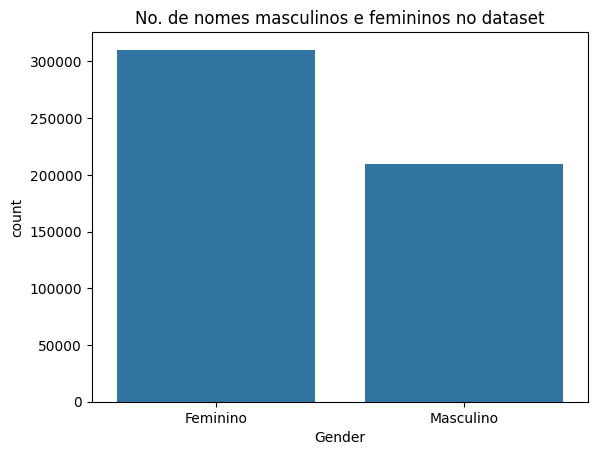

In [13]:
sns.countplot(x='Gender',data = dataset)

plt.title('No. de nomes masculinos e femininos no dataset')

plt.xticks([0,1],('Feminino','Masculino'))

In [14]:

alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
             'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:
    # Filtrar o DataFrame removendo os valores NaN na coluna 'Name'
    filtered_data = dataset.dropna(subset=['Name'])
    # Contar o número de nomes que começam com a letra atual
    startletter_count[i] = len(filtered_data[filtered_data['Name'].str.startswith(i)])

print(startletter_count)


{'A': 51389, 'B': 4745, 'C': 24551, 'D': 28658, 'E': 50263, 'F': 5048, 'G': 29508, 'H': 26172, 'I': 23419, 'J': 48274, 'K': 27051, 'L': 38452, 'M': 23751, 'N': 18352, 'O': 10631, 'P': 2500, 'Q': 551, 'R': 23789, 'S': 23747, 'T': 15913, 'U': 7822, 'V': 8963, 'W': 13520, 'X': 345, 'Y': 5184, 'Z': 7252}


Text(0.5, 1.0, 'No. de nomes por letras')

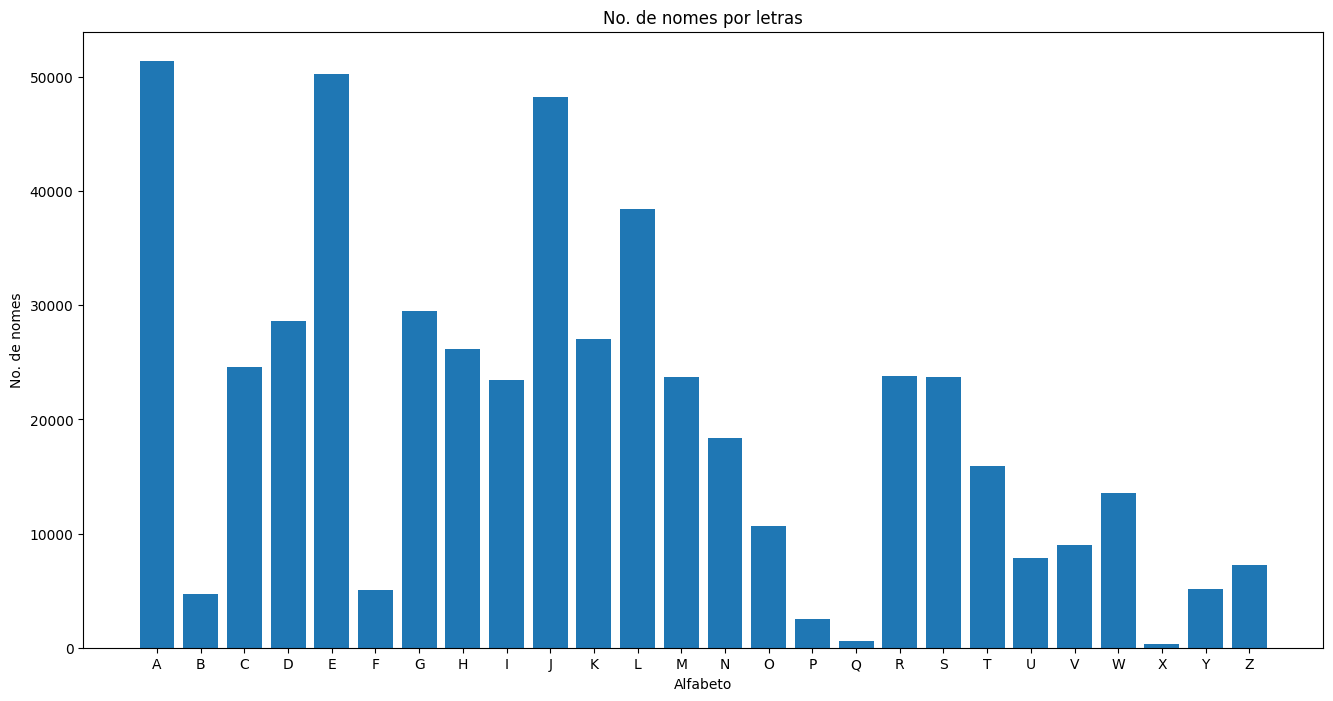

In [15]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Alfabeto')

plt.ylabel('No. de nomes')

plt.title('No. de nomes por letras')

In [16]:
X =list( dataset['Name'])

Y = list(dataset['Gender'])

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y = encoder.fit_transform(Y)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Preencher os valores NaN com uma string vazia
X = np.where(pd.isnull(X), '', X)

# Criar uma instância do CountVectorizer
cv = CountVectorizer(analyzer='char')

# Aplicar o vetorizador aos seus dados de texto e transformá-los em uma matriz densa
X = cv.fit_transform(X).toarray()


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)

In [ ]:
pip install xgboost

     |████████████████████████████████| 297.1 MB 33 kB/s  eta 0:00:01   |▉                               | 8.1 MB 4.5 MB/s eta 0:01:05     |████████▌                       | 78.6 MB 5.6 MB/s eta 0:00:39     |████████▉                       | 81.6 MB 6.0 MB/s eta 0:00:37     |██████████                      | 93.7 MB 4.6 MB/s eta 0:00:45
You should consider upgrading via the '/home/filipi/disciplinas/aprmaq/myenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(use_label_encoder= False)

XGB_model.fit(x_train,y_train)

XGB_y_pred = XGB_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

0.7818678884536467
              precision    recall  f1-score   support

           0       0.79      0.87      0.83    102300
           1       0.77      0.66      0.71     69252

    accuracy                           0.78    171552
   macro avg       0.78      0.76      0.77    171552
weighted avg       0.78      0.78      0.78    171552

[[88683 13617]
 [23804 45448]]
None


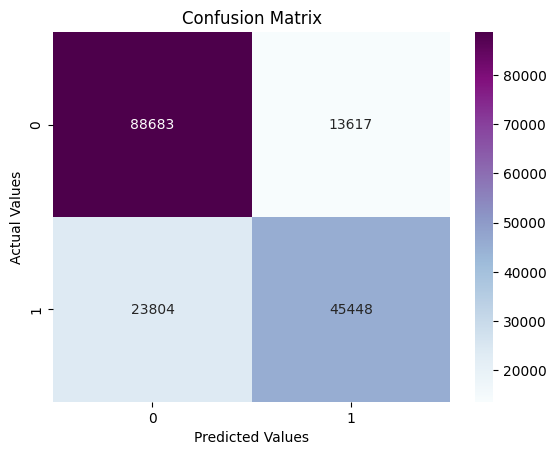

In [ ]:
import sklearn.metrics as metrics

#for logistic regression

print(metrics.accuracy_score(LR_y_pred,y_test))

print(metrics.classification_report(y_test, LR_y_pred))

print(cmatrix(LR_model))

0.7694110240626749
              precision    recall  f1-score   support

           0       0.77      0.88      0.82    102300
           1       0.77      0.61      0.68     69252

    accuracy                           0.77    171552
   macro avg       0.77      0.74      0.75    171552
weighted avg       0.77      0.77      0.76    171552

[[89850 12450]
 [27108 42144]]
None


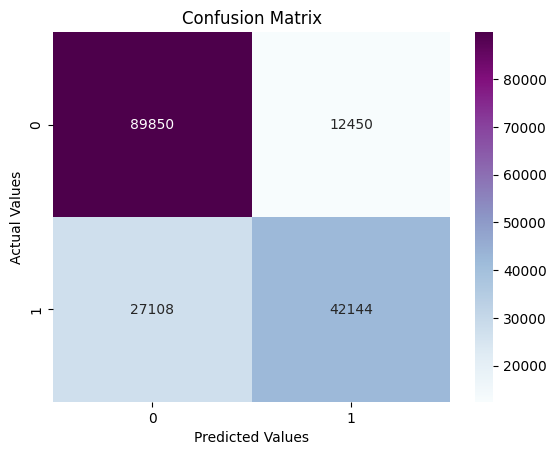

In [ ]:
# for naive bayes

print(metrics.accuracy_score(NB_y_pred,y_test))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

0.8247819903003171
              precision    recall  f1-score   support

           0       0.82      0.90      0.86    102300
           1       0.83      0.71      0.77     69252

    accuracy                           0.82    171552
   macro avg       0.83      0.81      0.81    171552
weighted avg       0.83      0.82      0.82    171552

[[91989 10311]
 [19748 49504]]
None


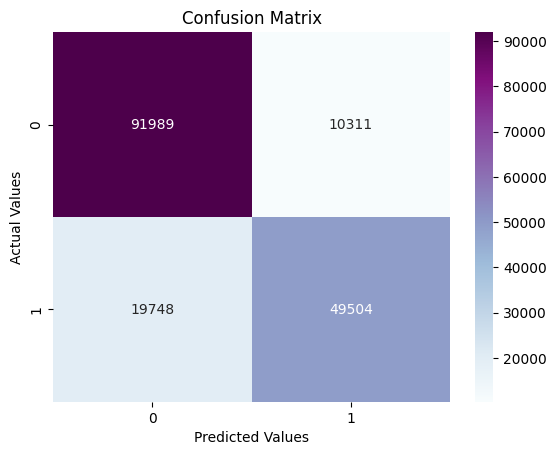

In [ ]:
# for XGBoost
print(metrics.accuracy_score(XGB_y_pred,y_test))

print(metrics.classification_report(y_test, XGB_y_pred))

print(cmatrix(XGB_model))

In [ ]:
from xgboost import XGBClassifier

# Treinar o modelo
XGB_model = XGBClassifier(use_label_encoder=False)
XGB_model.fit(x_train, y_train)

# Salvar o modelo
XGB_model.save_model('modelo_xgb.model')


/home/filipi/disciplinas/aprmaq/myenv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:53:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [20]:
pip install --upgrade tensorflow



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM

2024-07-16 20:02:58.085321: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 20:02:58.085952: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 20:02:58.089225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 20:02:58.097701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 20:02:58.109648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [22]:
voc_size = 26

In [23]:
max_words = 1000

max_len = 26

LSTM_model = Sequential()

LSTM_model.add(Embedding(voc_size,40))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(LSTM(100))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(64,activation='relu'))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(1,activation='sigmoid'))

LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
LSTM_model.fit(x_train,y_train,epochs=11,batch_size=64)


Epoch 1/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 126s 23ms/step - accuracy: 0.7086 - loss: 0.5638
Epoch 2/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 125s 23ms/step - accuracy: 0.7858 - loss: 0.4524
Epoch 3/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 123s 23ms/step - accuracy: 0.7996 - loss: 0.4267
Epoch 4/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 125s 23ms/step - accuracy: 0.8070 - loss: 0.4090
Epoch 5/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 124s 23ms/step - accuracy: 0.8117 - loss: 0.3991
Epoch 6/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 125s 23ms/step - accuracy: 0.8159 - loss: 0.3903
Epoch 7/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 126s 23ms/step - accuracy: 0.8197 - loss: 0.3819
Epoch 8/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 125s 23ms/step - accuracy: 0.8208 - loss: 0.3789
Epoch 9/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 125s 23ms/step - accuracy: 0.8250 - loss: 0.3709
Epoch 10/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 125s 23ms/step - accuracy: 0.8266 - loss: 0.3679
Epoch 11/11
5443/5443 ━━━━━━━━━━━━━━━━━━━━ 126s 23ms/step - accuracy: 0.8289 - loss: 0.36

In [25]:
def predict(name):
    # Vetorizar o nome usando o vetorizador
    name_vectorized = cv.transform([name]).toarray()
    # Fazer a previsão com o modelo LSTM
    prediction = LSTM_model.predict(name_vectorized)
    # Interpretar a previsão
    if prediction >= 0.5:
        out = 'Masculino'
    else:
        out = 'Feminino'
    return out


In [26]:
predict('Renata')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


'Feminino'

In [27]:
predict('Gael')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'Feminino'

In [35]:
predict('Marcus')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


'Feminino'

In [30]:
LSTM_model.save("LSTM_model.keras")


In [34]:
import pickle

with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)